# 1. VNExpress News Data Overview
## 1.1. Giới thiệu dữ liệu
VNExpress là một trong những trang báo điện tử lớn nhất tại Việt Nam, cung cấp tin tức về nhiều lĩnh vực như chính trị, kinh tế, xã hội, thể thao, giải trí và công nghệ. Dưới đây là một số thông tin về dữ liệu từ VNExpress:
* Nguồn dữ liệu: VNExpress
* Thời gian thu thập: Từ tháng 1 năm 2025 đến tháng 3 năm 2025
* Các lĩnh vực tin tức: Tập trung vào Công nghệ và Khoa học
* Số lượng bài viết: Khoảng 1.200 bài viết

## 1.2. Mục tiêu phân tích
Notebook này thực hiện khảo sát và thống kê sơ bộ dữ liệu thu thập từ VNExpress, tập trung vào hai nhóm bài viết: **"Khoa học"** và **"Công nghệ"**.

**Mục tiêu chính**: Đánh giá tính khả thi của bài toán phân loại bài viết thành hai nhóm: Khoa học và Công nghệ dựa trên nội dung văn bản và các đặc trưng khác.

## 1.3. Cấu trúc dữ liệu
Dữ liệu bao gồm các trường:
* `title`: Tiêu đề bài viết
* `description`: Mô tả ngắn gọn về nội dung
* `content`: Nội dung bài viết
* `group`: Danh mục bài viết (Công nghệ, Khoa học)
* `category`: Thể loại bài viết chi tiết
* `date`: Ngày xuất bản bài viết
* `author`: Tác giả bài viết
* `url`: Đường dẫn đến bài viết
* `thumbnail`: Đường dẫn đến hình ảnh đại diện bài viết
* `tags`: Các thẻ liên quan đến bài viết
* `nums_of_comments`: Số lượng bình luận bài viết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import re
from collections import Counter

# Thiết lập để hiển thị biểu đồ đẹp hơn
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Để hiển thị Tiếng Việt đúng
plt.rcParams['font.family'] = 'DejaVu Sans'

# Tạo thư mục nếu chưa tồn tại
os.makedirs('../raw_data', exist_ok=True)
os.makedirs('../clean_data', exist_ok=True)

import warnings
warnings.filterwarnings('ignore')

## 1.4. Đọc và tìm hiểu dữ liệu
Dữ liệu được thu thập qua quá trình crawl từ trang VNExpress. Chúng ta sẽ đọc dữ liệu từ file CSV đã lưu trữ.

In [ ]:
# Đường dẫn file gốc và file đích
input_path = '../data/vnexpress_raw_data.csv'
output_path = '../raw_data/vnexpress_raw_data.csv'

# Kiểm tra nếu file đã tồn tại trong raw_data
if not os.path.exists(output_path) and os.path.exists(input_path):
    # Copy file sang thư mục raw_data
    import shutil
    shutil.copy(input_path, output_path)
    print(f"Đã sao chép dữ liệu gốc sang {output_path}")
elif not os.path.exists(input_path):
    print(f"Không tìm thấy file dữ liệu gốc tại {input_path}")
else:
    print(f"Dữ liệu gốc đã tồn tại tại {output_path}")

In [ ]:
# Đọc dữ liệu từ raw_data
df = pd.read_csv('../raw_data/vnexpress_raw_data.csv', encoding='utf-8')

# Hiển thị thông tin cơ bản của tập dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")
print("\nThông tin cột:")
df.info()

Kích thước dữ liệu: (1184, 11)

Thông tin cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1184 non-null   object
 1   description       1182 non-null   object
 2   date              1182 non-null   object
 3   category          1128 non-null   object
 4   thumbnail         1143 non-null   object
 5   content           1181 non-null   object
 6   author            932 non-null    object
 7   tags              1184 non-null   object
 8   group             1184 non-null   object
 9   nums_of_comments  1184 non-null   int64 
 10  url               1184 non-null   object
dtypes: int64(1), object(10)
memory usage: 101.9+ KB


In [ ]:
# Hiển thị một số dòng đầu tiên
df.head(3)

,title,description,date,category,thumbnail,content,author,tags,group,nums_of_comments,url
0,Elon Musk ra chatbot AI 'thông minh nhất Trái ...,"xAI, công ty do Elon Musk sáng lập, công bố Gr...","Thứ ba, 18/2/2025, 12:30 (GMT+7)",AI,https://i1-sohoa.vnecdn.net/2025/02/18/Screens...,"Trong livestream ra mắt Grok 3 trên X, diễn ra...",Bảo Lâm,elon musk,Công nghệ,118,https://vnexpress.net/elon-musk-ra-chatbot-ai-...
1,Winsler 70W Ultra Slim - củ sạc laptop mỏng nh...,"Củ sạc Winsler 70W có độ mỏng 12,8 mm, tích hợ...","Thứ năm, 6/3/2025, 16:00 (GMT+7)",Thiết bị,https://i1-sohoa.vnecdn.net/2025/03/06/1-17412...,So với các củ sạc laptop công suất 70W của các...,NaN,"winsler, sạc laptop",Công nghệ,0,https://vnexpress.net/winsler-70w-ultra-slim-c...


## 1.5. Khám phá cấu trúc dữ liệu
### 1.5.1. Thống kê dữ liệu thiếu

In [ ]:
print("Số lượng giá trị thiếu trong mỗi cột:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})
missing_df

Thống kê mô tả cho các cột số:


,count,mean,std,min,25%,50%,75%,max
nums_of_comments,1184.0,29.304899,47.305494,0.0,3.0,12.0,33.0,389.0


### 1.5.2. Phân bố dữ liệu theo nhóm chính (Khoa học/Công nghệ)

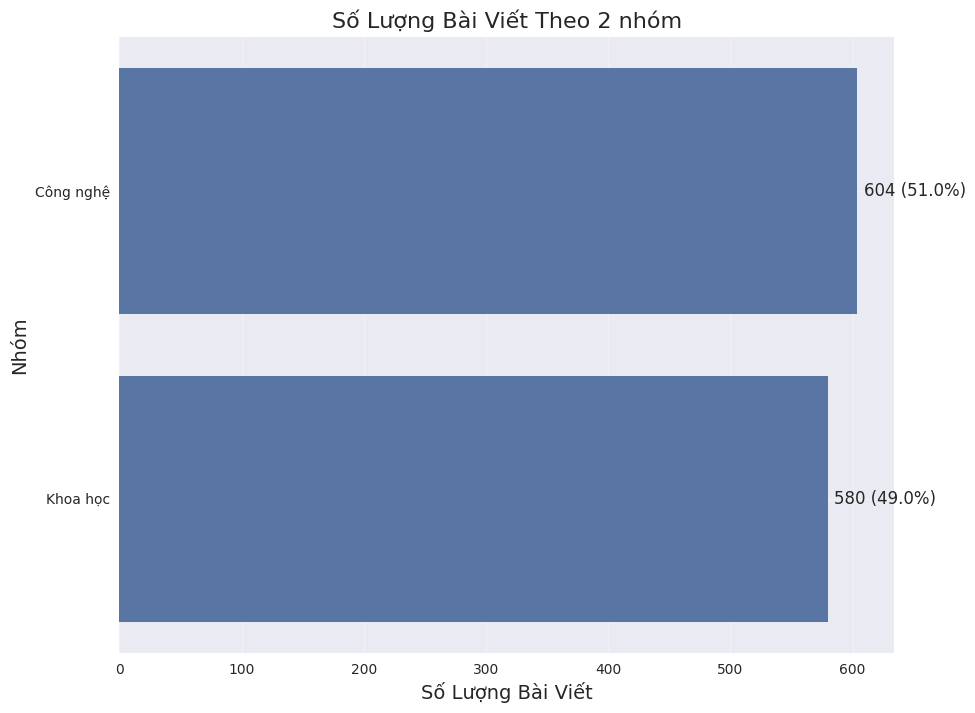

Tổng số bài viết: 1184
- Công nghệ: 604 bài viết (51.0%)
- Khoa học: 580 bài viết (49.0%)


In [28]:
plt.figure(figsize=(10, 8))
category_counts = df['group'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.title('Số Lượng Bài Viết Theo 2 nhóm', fontsize=16)
plt.xlabel('Số Lượng Bài Viết', fontsize=14)
plt.ylabel('Nhóm', fontsize=14)
plt.grid(True, alpha=0.3)

# Add count labels on bars
for i, v in enumerate(category_counts.values):
    plt.text(v + 5, i, f"{v} ({v/len(df)*100:.1f}%)", va='center')

plt.show()

# Add text summary below the plot
print(f"Tổng số bài viết: {len(df)}")
for group, count in category_counts.items():
    print(f"- {group}: {count} bài viết ({count/len(df)*100:.1f}%)")

## 1.6. Xác định bài toán phù hợp với dữ liệu

### Phân loại bài viết thành Khoa học / Công nghệ (group)

* **Mục tiêu**: Dự đoán bài viết thuộc nhóm Khoa học hay Công nghệ dựa trên nội dung và các đặc trưng khác.

* **Ưu điểm của bài toán**:
  - Dữ liệu khá cân bằng giữa hai nhóm (~51% Công nghệ, ~49% Khoa học)
  - Có nhiều đặc trưng văn bản phong phú: tiêu đề, nội dung, mô tả, tags
  - Các đặc trưng bổ sung như ngày đăng, tác giả có thể cung cấp thông tin hữu ích
  - Các mô hình phân loại như SVM, Random Forest, hoặc Deep Learning có tiềm năng áp dụng tốt

* **Tiềm năng ứng dụng**:
  - Phân loại tự động bài viết mới
  - Hỗ trợ hệ thống gợi ý nội dung cho người đọc
  - Phục vụ phân tích xu hướng trong các lĩnh vực khoa học và công nghệ

* **Kết luận**: Bài toán phân loại Khoa học / Công nghệ có tính khả thi cao, dễ triển khai và có tiềm năng ứng dụng thực tế. Trong các notebook tiếp theo, chúng ta sẽ thực hiện các bước cần thiết để chuẩn bị dữ liệu và đánh giá chi tiết hơn về tính khả thi của bài toán.